# Augmented Dickey Fuller Test (ADF Test) 

## 1. Introduction

The ADF test is fundamentally a statistical significance test. 

There is a hypothesis testing involved with a null and alternate hypothesis and as a result a test statistic is computed and p-values get reported.

It is from the test statistic and the p-value, you can make an inference as to whether a given series is stationary or not.

## 2. What is a Unit Root Test?

Unit root is a characteristic of a time series that makes it non-stationary. 

If α=1, the time series is non-stationary. 

The number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary.

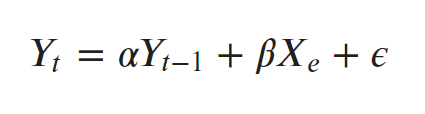

In [1]:
from IPython.display import Image
Image(filename="./figures/equation_1.png")

## 3. Dickey-Fuller Test

A Dickey-Fuller test is a unit root test that tests the null hypothesis that α=1 in the following model equation. alpha is the coefficient of the first lag on Y.

Null Hypothesis (H0): α=1

- y(t-1) = lag 1 of time series
- delta Y(t-1) = first difference of the series at time (t-1)

The null hypothesis assumes the presence of unit root, that is α=1.

The p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

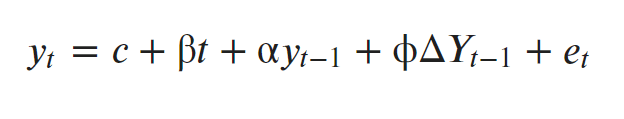

In [2]:
from IPython.display import Image
Image(filename="./figures/equation_2.png")

## 4. How does Augmented Dickey Fuller (ADF) Test work?

The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model.

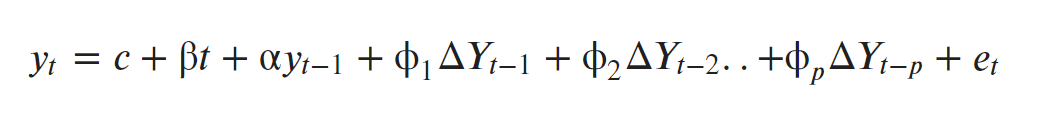

In [3]:
from IPython.display import Image
Image(filename="./figures/equation_3.png")

## 5. ADF Test in Python

The statsmodel package provides a reliable implementation of the ADF test via the adfuller() function in statsmodels.tsa.stattools. 

It returns the following outputs:

- The p-value
- The value of the test statistic
- Number of lags considered for the test
- The critical value cutoffs.

An optional argument the adfuller() accepts is the number of lags you want to consider while performing the OLS regression.

You can let the algorithm compute the optimal number of lags iteratively. This can be done by setting the autolag='AIC'. By doing so, the adfuller will choose a the number of lags that yields the lowest AIC.

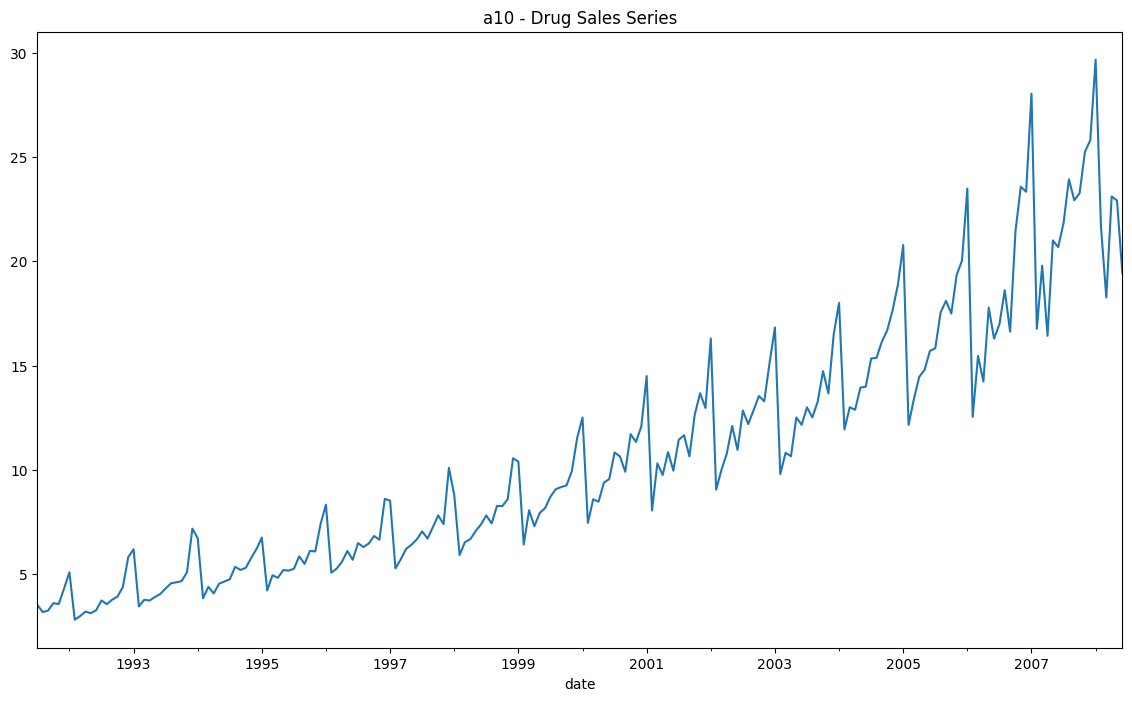

In [4]:
# Setup and Import data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');

In [5]:
# ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 3.145185689306734
n_lags: 1.0
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


## 6. ADF Test on stationary series

In [6]:
# ADF test on random numbers
series = np.random.randn(100)
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.572353547632291
p-value: 7.25042084359941e-19
Critial Values:
   1%, -3.498198082189098
Critial Values:
   5%, -2.891208211860468
Critial Values:
   10%, -2.5825959973472097


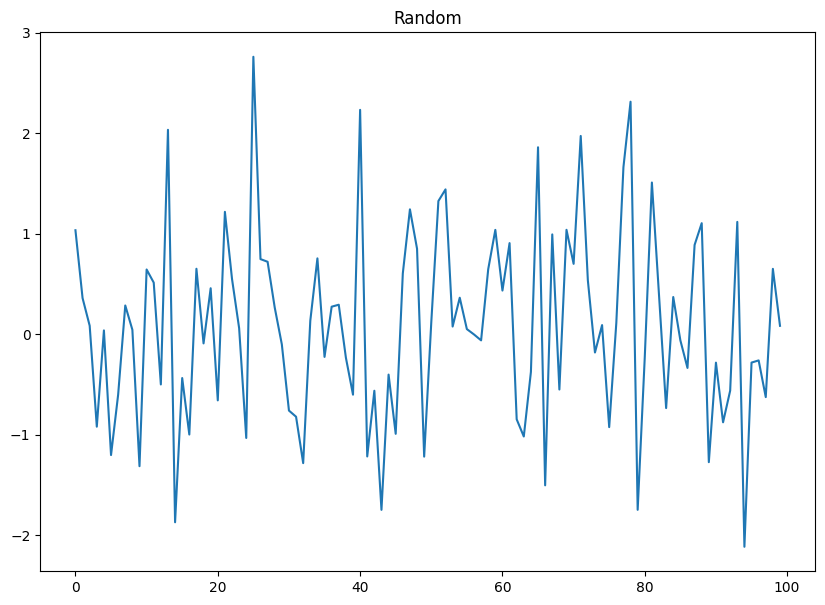

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(series);
plt.title('Random');